<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula10a_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:,2:4]
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

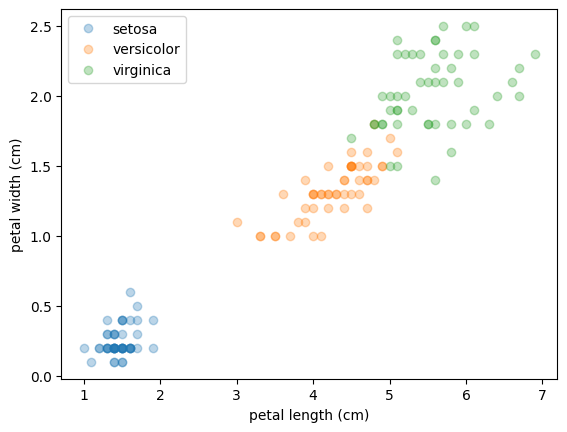

In [3]:
import matplotlib.pyplot as plt

for i in range(len(set(y))):
    plt.plot(X[y==i,0],X[y==i,1],'o', label=data.target_names[i], alpha=0.3)
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
plt.legend()
plt.show()

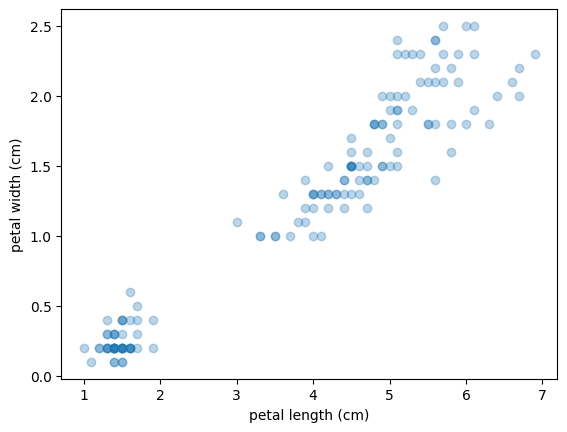

In [5]:
plt.scatter(X[:,0],X[:,1],marker='o',alpha=0.3)
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
plt.show()

[[4.26923077 1.34230769]
 [5.59583333 2.0375    ]
 [1.462      0.246     ]]


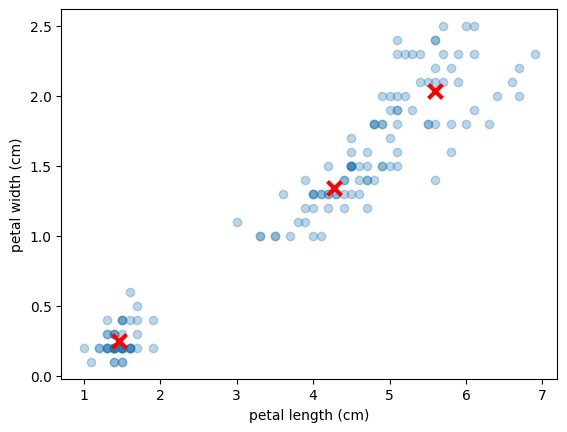

In [18]:
from sklearn.base import BaseEstimator, ClusterMixin, TransformerMixin
import numpy as np
import random

class KMeans(BaseEstimator, ClusterMixin, TransformerMixin):
    def __init__(self, n_clusters=3):
        self.n_clusters = n_clusters

    def _init_centroids(self, X):
        self.centroids = X[random.sample(range(len(X)),self.n_clusters)]

    def _assign_clusters(self, X):
        self.clusters = [[] for _ in range(self.n_clusters)]
        for x in X:
            distances = [np.linalg.norm(x-c) for c in self.centroids]
            self.clusters[np.argmin(distances)].append(x)

    def _update_centroids(self):
        self.centroids = np.array([np.mean(c,axis=0) for c in self.clusters])

    def _run_kmeans(self, X):
        for _ in range(10):
            self._assign_clusters(X)
            self._update_centroids()

    def fit(self, X, y=None):
        self._init_centroids(X)
        self._run_kmeans(X)
        return self

    def transform(self, X, y=None):
        self._assign_clusters(X)
        return self.clusters

    def predict(self, X, y=None):
        self._assign_clusters(X)
        return np.array([np.argmin([np.linalg.norm(x-c) for c in self.centroids]) for x in X])

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print(kmeans.centroids)

plt.scatter(X[:,0],X[:,1],marker='o',alpha=0.3)
plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1],
            marker='x', color='red', s=100, linewidths=3)
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
plt.show()

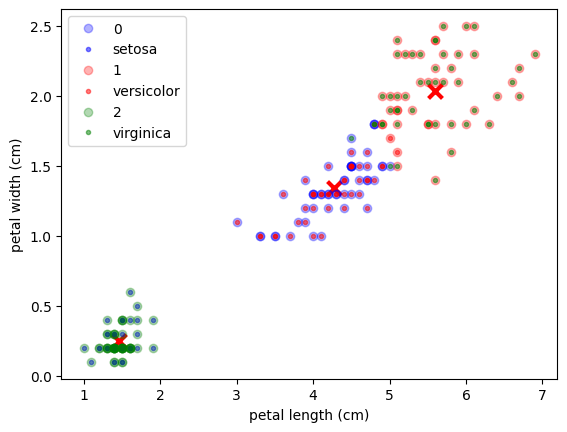

In [31]:
ypred = kmeans.predict(X)
colors = ['blue', 'red', 'green']
for i in range(len(set(y))):
    plt.plot(X[ypred==i,0],X[ypred==i,1], 'o', label=i, alpha=0.3, color=colors[i])
    plt.plot(X[y==i,0],X[y==i,1], '.', label=data.target_names[i], alpha=0.5, color=colors[i])
plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1],
            marker='x', color='red', s=100, linewidths=3)
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
plt.legend()
plt.show()

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print(kmeans.cluster_centers_)

[[5.62608696 2.04782609]
 [1.462      0.246     ]
 [4.29259259 1.35925926]]


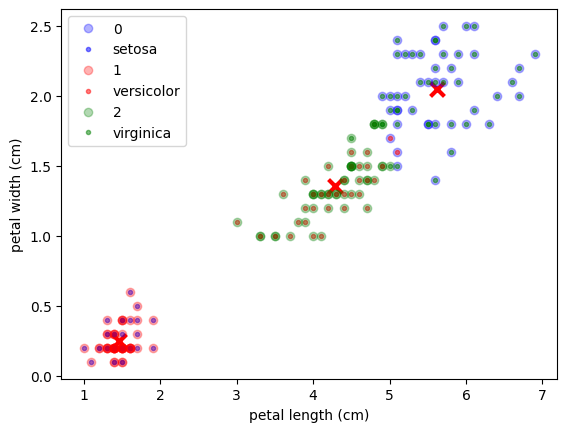

In [34]:
ypred = kmeans.predict(X)
colors = ['blue', 'red', 'green']
for i in range(len(set(y))):
    plt.plot(X[ypred==i,0],X[ypred==i,1], 'o', label=i, alpha=0.3, color=colors[i])
    plt.plot(X[y==i,0],X[y==i,1], '.', label=data.target_names[i], alpha=0.5, color=colors[i])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
            marker='x', color='red', s=100, linewidths=3)
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
plt.legend()
plt.show()

[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


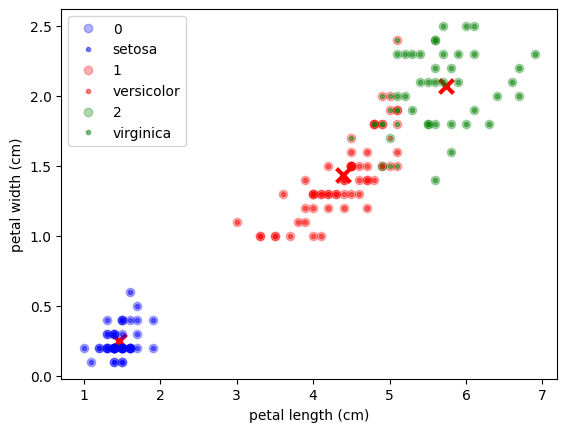

In [48]:
kmeans.fit(data.data)
print(kmeans.cluster_centers_)
ypred = kmeans.predict(data.data)
colors = ['blue', 'red', 'green']
for i in range(len(set(y))):
    plt.plot(X[ypred==i,0],X[ypred==i,1], 'o', label=i, alpha=0.3, color=colors[i])
    plt.plot(X[y==i,0],X[y==i,1], '.', label=data.target_names[i], alpha=0.5, color=colors[i])
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],
            marker='x', color='red', s=100, linewidths=3)
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
plt.legend()
plt.show()